In [ ]:
"""
Grupo 1 DEX 04 -  Dinâmica Day 5

Abel - 15010
Adriano - 13742
Logan - 13764
Marco - 13540
Victor - 10191
"""

In [1]:
#Import de bibliotecas úteis.
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import random as rd


In [2]:
#montando o dataframe
dataset = pd.read_csv('nyflights.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

In [3]:
# ETAPA 1 - A

hr_2 = dataset['dep_delay'] > 120
df_2hour = dataset[hr_2]
df_2hour

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
151,152,2013,1,1,848.0,1835,853.0,1001.0,1950,851.0,MQ,3944,N942MQ,JFK,BWI,41.0,184,18,35,2013-01-01 18:00:00
218,219,2013,1,1,957.0,733,144.0,1056.0,853,123.0,UA,856,N534UA,EWR,BOS,37.0,200,7,33,2013-01-01 07:00:00
268,269,2013,1,1,1114.0,900,134.0,1447.0,1222,145.0,UA,1086,N76502,LGA,IAH,248.0,1416,9,0,2013-01-01 09:00:00
491,492,2013,1,1,1540.0,1338,122.0,2020.0,1825,115.0,B6,705,N570JB,JFK,SJU,193.0,1598,13,38,2013-01-01 13:00:00
649,650,2013,1,1,1815.0,1325,290.0,2120.0,1542,338.0,EV,4417,N17185,EWR,OMA,213.0,1134,13,25,2013-01-01 13:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336579,336580,2013,9,30,1823.0,1545,158.0,1934.0,1733,121.0,9E,3459,N916XJ,JFK,BNA,95.0,765,15,45,2013-09-30 15:00:00
336668,336669,2013,9,30,1951.0,1649,182.0,2157.0,1903,174.0,EV,4294,N13988,EWR,SAV,95.0,708,16,49,2013-09-30 16:00:00
336724,336725,2013,9,30,2053.0,1815,158.0,2310.0,2054,136.0,EV,5292,N600QX,EWR,ATL,91.0,746,18,15,2013-09-30 18:00:00
336757,336758,2013,9,30,2159.0,1845,194.0,2344.0,2030,194.0,9E,3320,N906XJ,JFK,BUF,50.0,301,18,45,2013-09-30 18:00:00


In [4]:
# ETAPA 1 - B

descr_2hr =  df_2hour.describe().T
descr_2hr

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,9723.0,188874.051836,87520.888880,152.0,120654.0,203539.0,258522.0,336764.0
year,9723.0,2013.000000,0.000000,2013.0,2013.0,2013.0,2013.0,2013.0
month,9723.0,6.300627,3.058476,1.0,4.0,6.0,8.0,12.0
day,9723.0,15.563715,8.739641,1.0,8.0,16.0,23.0,31.0
dep_time,9723.0,1750.786691,585.010628,1.0,1544.0,1931.0,2146.0,2400.0
sched_dep_time,9723.0,1613.244986,389.242304,500.0,1429.0,1705.0,1916.0,2359.0
dep_delay,9723.0,186.983236,74.596836,121.0,139.0,166.0,210.0,1301.0
arr_time,9637.0,1377.411850,900.204935,1.0,221.0,1755.0,2150.0,2400.0
sched_arr_time,9723.0,1772.554356,480.403889,1.0,1555.0,1910.0,2125.0,2359.0
arr_delay,9597.0,183.001355,77.519925,57.0,134.0,164.0,211.0,1272.0


In [5]:
dep_delay_2hr = descr_2hr.loc['dep_delay']
dep_delay_2hr

count    9723.000000
mean      186.983236
std        74.596836
min       121.000000
25%       139.000000
50%       166.000000
75%       210.000000
max      1301.000000
Name: dep_delay, dtype: float64

In [6]:
# ETAPA 1 - C

dep_delay_2hr['range'] = dep_delay_2hr['max'] - dep_delay_2hr['min']
dep_delay_2hr

count    9723.000000
mean      186.983236
std        74.596836
min       121.000000
25%       139.000000
50%       166.000000
75%       210.000000
max      1301.000000
range    1180.000000
Name: dep_delay, dtype: float64

In [7]:
# ETAPA 1 - D

dep_delay_2hr['var'] =  dep_delay_2hr['std'] * dep_delay_2hr['std']
dep_delay_2hr

count    9723.000000
mean      186.983236
std        74.596836
min       121.000000
25%       139.000000
50%       166.000000
75%       210.000000
max      1301.000000
range    1180.000000
var      5564.687952
Name: dep_delay, dtype: float64

In [8]:
#ETAPA 2 - A

data = dataset[dataset['dep_delay'] > 5]
data

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
25,26,2013,1,1,608.0,600,8.0,807.0,735,32.0,MQ,3768,N9EAMQ,EWR,ORD,139.0,719,6,0,2013-01-01 06:00:00
26,27,2013,1,1,611.0,600,11.0,945.0,931,14.0,UA,303,N532UA,JFK,SFO,366.0,2586,6,0,2013-01-01 06:00:00
31,32,2013,1,1,623.0,610,13.0,920.0,915,5.0,AA,1837,N3EMAA,LGA,MIA,153.0,1096,6,10,2013-01-01 06:00:00
41,42,2013,1,1,632.0,608,24.0,740.0,728,12.0,EV,4144,N13553,EWR,IAD,52.0,212,6,8,2013-01-01 06:00:00
47,48,2013,1,1,644.0,636,8.0,931.0,940,-9.0,UA,1701,N75435,EWR,FLL,151.0,1065,6,36,2013-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336759,336760,2013,9,30,2207.0,2140,27.0,2257.0,2250,7.0,MQ,3660,N532MQ,LGA,BNA,97.0,764,21,40,2013-09-30 21:00:00
336760,336761,2013,9,30,2211.0,2059,72.0,2339.0,2242,57.0,EV,4672,N12145,EWR,STL,120.0,872,20,59,2013-09-30 20:00:00
336762,336763,2013,9,30,2233.0,2113,80.0,112.0,30,42.0,UA,471,N578UA,EWR,SFO,318.0,2565,21,13,2013-09-30 21:00:00
336763,336764,2013,9,30,2235.0,2001,154.0,59.0,2249,130.0,B6,1083,N804JB,JFK,MCO,123.0,944,20,1,2013-09-30 20:00:00


In [9]:
#ETAPA 2 - B
summarized = data[['dest', 'flight']].groupby('dest').agg('count')
result = summarized.sort_values('flight', ascending=False)
result.head()

,flight
dest,
ORD,4975
ATL,4687
LAX,4442
MCO,4083
SFO,4078


In [10]:
#ETAPA 2 - C
result.tail()

,flight
dest,
SBN,6
MTJ,6
EYW,6
PSP,3
ANC,3


In [11]:
#ETAPA 3 - A
dest = result.head().reset_index()
dest = list(dest['dest'])

dest_df = dataset.loc[(dataset['dest'].isin(dest)) & (dataset['dep_delay'] > 5)]
dest_df

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
25,26,2013,1,1,608.0,600,8.0,807.0,735,32.0,MQ,3768,N9EAMQ,EWR,ORD,139.0,719,6,0,2013-01-01 06:00:00
26,27,2013,1,1,611.0,600,11.0,945.0,931,14.0,UA,303,N532UA,JFK,SFO,366.0,2586,6,0,2013-01-01 06:00:00
70,71,2013,1,1,709.0,700,9.0,852.0,832,20.0,UA,1092,N26226,LGA,ORD,135.0,733,7,0,2013-01-01 07:00:00
85,86,2013,1,1,732.0,645,47.0,1011.0,941,30.0,UA,1111,N37456,EWR,MCO,145.0,937,6,45,2013-01-01 06:00:00
91,92,2013,1,1,743.0,730,13.0,1107.0,1100,7.0,AA,33,N338AA,JFK,LAX,358.0,2475,7,30,2013-01-01 07:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336704,336705,2013,9,30,2028.0,1910,78.0,2255.0,2215,40.0,AA,21,N338AA,JFK,LAX,294.0,2475,19,10,2013-09-30 19:00:00
336724,336725,2013,9,30,2053.0,1815,158.0,2310.0,2054,136.0,EV,5292,N600QX,EWR,ATL,91.0,746,18,15,2013-09-30 18:00:00
336744,336745,2013,9,30,2121.0,2100,21.0,2349.0,14,-25.0,DL,2363,N193DN,JFK,LAX,296.0,2475,21,0,2013-09-30 21:00:00
336762,336763,2013,9,30,2233.0,2113,80.0,112.0,30,42.0,UA,471,N578UA,EWR,SFO,318.0,2565,21,13,2013-09-30 21:00:00


In [12]:
#ETAPA 3 - B
dest_df.loc[:,'med_veloc'] = dest_df.loc[:,'distance'] /  (dest_df.loc[:,'air_time'] / 60)
dest_df

/home/marco/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,med_veloc
25,26,2013,1,1,608.0,600,8.0,807.0,735,32.0,...,3768,N9EAMQ,EWR,ORD,139.0,719,6,0,2013-01-01 06:00:00,310.359712
26,27,2013,1,1,611.0,600,11.0,945.0,931,14.0,...,303,N532UA,JFK,SFO,366.0,2586,6,0,2013-01-01 06:00:00,423.934426
70,71,2013,1,1,709.0,700,9.0,852.0,832,20.0,...,1092,N26226,LGA,ORD,135.0,733,7,0,2013-01-01 07:00:00,325.777778
85,86,2013,1,1,732.0,645,47.0,1011.0,941,30.0,...,1111,N37456,EWR,MCO,145.0,937,6,45,2013-01-01 06:00:00,387.724138
91,92,2013,1,1,743.0,730,13.0,1107.0,1100,7.0,...,33,N338AA,JFK,LAX,358.0,2475,7,30,2013-01-01 07:00:00,414.804469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336704,336705,2013,9,30,2028.0,1910,78.0,2255.0,2215,40.0,...,21,N338AA,JFK,LAX,294.0,2475,19,10,2013-09-30 19:00:00,505.102041
336724,336725,2013,9,30,2053.0,1815,158.0,2310.0,2054,136.0,...,5292,N600QX,EWR,ATL,91.0,746,18,15,2013-09-30 18:00:00,491.868132
336744,336745,2013,9,30,2121.0,2100,21.0,2349.0,14,-25.0,...,2363,N193DN,JFK,LAX,296.0,2475,21,0,2013-09-30 21:00:00,501.689189
336762,336763,2013,9,30,2233.0,2113,80.0,112.0,30,42.0,...,471,N578UA,EWR,SFO,318.0,2565,21,13,2013-09-30 21:00:00,483.962264


In [13]:
#ETAPA 3 - C
dest_df[['dest', 'med_veloc']].groupby('dest').agg('mean').sort_values('med_veloc', ascending=False)

,med_veloc
dest,
LAX,455.714026
SFO,449.594661
MCO,423.584634
ATL,406.380082
ORD,380.128303


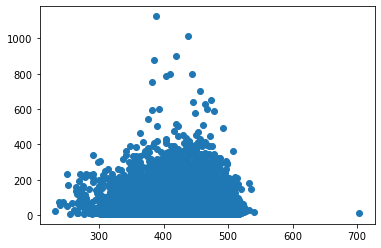

In [16]:
# Se aumentarmos a velocidade média, diminuiriam os atrasos?
plt.scatter(dest_df['med_veloc'], dest_df['dep_delay'])
plt.show()

In [20]:
dest_df[['med_veloc', 'dep_delay']].corr()


,med_veloc,dep_delay
med_veloc,1.000000,-0.021559
dep_delay,-0.021559,1.000000


In [22]:
dest_df.corr()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute,med_veloc
Unnamed: 0,1.000000,NaN,0.019384,0.076534,0.038106,0.038265,0.088071,-0.029679,0.010603,0.078898,0.030143,-0.022159,0.028846,0.037006,0.025854,0.313186
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.019384,NaN,1.000000,-0.003164,0.011617,0.017402,-0.033050,-0.005978,-0.000584,-0.019766,-0.019593,0.040682,0.043128,0.017781,-0.007920,0.050807
day,0.076534,NaN,-0.003164,1.000000,-0.004563,-0.002131,-0.015302,-0.000631,-0.000856,-0.013559,0.003218,0.008500,0.006831,-0.002335,0.004224,0.013778
dep_time,0.038106,NaN,0.011617,-0.004563,1.000000,0.914011,0.197350,0.264060,0.617500,0.177079,-0.021204,-0.006068,0.000432,0.911802,0.041051,0.046882
sched_dep_time,0.038265,NaN,0.017402,-0.002131,0.914011,1.000000,0.109697,0.250433,0.631239,0.086801,-0.033348,0.006072,0.015732,0.998830,0.019159,0.075726
dep_delay,0.088071,NaN,-0.033050,-0.015302,0.197350,0.109697,1.000000,-0.155595,0.077301,0.935109,0.023466,-0.070465,-0.067428,0.110059,-0.008031,-0.021559
arr_time,-0.029679,NaN,-0.005978,-0.000631,0.264060,0.250433,-0.155595,1.000000,0.514312,-0.147908,0.017965,-0.045365,-0.048304,0.249241,0.023397,-0.051557
sched_arr_time,0.010603,NaN,-0.000584,-0.000856,0.617500,0.631239,0.077301,0.514312,1.000000,0.068757,-0.041856,0.034648,0.036324,0.630870,0.004458,0.051155
arr_delay,0.078898,NaN,-0.019766,-0.013559,0.177079,0.086801,0.935109,-0.147908,0.068757,1.000000,0.041356,-0.076405,-0.099242,0.086819,-0.000812,-0.168648


In [29]:
dest_l = result.tail().reset_index()
dest_l = list(dest_l['dest'])

dest_df_l = dataset.loc[(dataset['dest'].isin(dest_l))]
dest_df_l.loc[:,'med_veloc'] = dest_df_l.loc[:,'distance'] / (dest_df_l.loc[:,'air_time'] / 60)
dest_df_l

/home/marco/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,med_veloc
3796,3797,2013,1,5,859.0,901,-2.0,1144.0,1201,-17.0,...,486,N842UA,EWR,MTJ,265.0,1795,9,1,2013-01-05 09:00:00,406.415094
3861,3862,2013,1,5,1048.0,1035,13.0,1443.0,1358,45.0,...,1873,N310DE,LGA,EYW,178.0,1207,10,35,2013-01-05 10:00:00,406.853933
3866,3867,2013,1,5,1101.0,1055,6.0,1342.0,1400,-18.0,...,55,N839VA,JFK,PSP,324.0,2378,10,55,2013-01-05 10:00:00,440.370370
9945,9946,2013,1,12,859.0,901,-2.0,1146.0,1201,-15.0,...,486,N843UA,EWR,MTJ,258.0,1795,9,1,2013-01-12 09:00:00,417.441860
10006,10007,2013,1,12,1045.0,1055,-10.0,1342.0,1400,-18.0,...,55,N841VA,JFK,PSP,338.0,2378,10,55,2013-01-12 10:00:00,422.130178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309319,309320,2013,9,1,833.0,840,-7.0,1030.0,1040,-10.0,...,6067,N12157,EWR,SBN,91.0,637,8,40,2013-09-01 08:00:00,420.000000
315543,315544,2013,9,8,847.0,840,7.0,1043.0,1040,3.0,...,6067,N13975,EWR,SBN,97.0,637,8,40,2013-09-08 08:00:00,394.020619
327556,327557,2013,9,20,1948.0,1950,-2.0,2207.0,2216,-9.0,...,4885,N759EV,LGA,SBN,91.0,651,19,50,2013-09-20 19:00:00,429.230769
328515,328516,2013,9,22,837.0,840,-3.0,1025.0,1040,-15.0,...,6067,N16951,EWR,SBN,92.0,637,8,40,2013-09-22 08:00:00,415.434783


In [31]:
dest_df_l[['dest', 'med_veloc']].groupby('dest').agg('mean').sort_values('med_veloc', ascending=False)

,med_veloc
dest,
ANC,489.985945
PSP,429.749501
MTJ,424.539643
EYW,417.785103
SBN,407.238481


In [41]:
ad_5 = dest_df_l[['dest', 'med_veloc']].groupby('dest').agg('mean').sort_values('med_veloc', ascending=False)
at_5 = dest_df[['dest', 'med_veloc']].groupby('dest').agg('mean').sort_values('med_veloc', ascending=False)

df_at_ad = pd.concat([ad_5, at_5]).reset_index()
df_at_ad['type'] = 'adiantado'
df_at_ad.loc[5:,'type'] = 'atrasado'
df_at_ad

,dest,med_veloc,type
0,ANC,489.985945,adiantado
1,PSP,429.749501,adiantado
2,MTJ,424.539643,adiantado
3,EYW,417.785103,adiantado
4,SBN,407.238481,adiantado
5,LAX,455.714026,atrasado
6,SFO,449.594661,atrasado
7,MCO,423.584634,atrasado
8,ATL,406.380082,atrasado
9,ORD,380.128303,atrasado


<Figure size 1080x504 with 0 Axes>

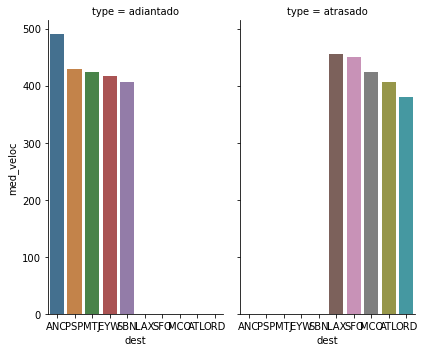

In [51]:
plt.figure(figsize=(15,7))

sns.catplot(x="dest", y="med_veloc", col="type",
            data=df_at_ad, saturation=.5,
            kind="bar", ci=None, aspect=.6)



In [ ]:
# Aumentar a velocidade média não influencia na redução de atraso.